<a href="https://colab.research.google.com/github/Zoey1219/Data-Visualization/blob/main/DV_final_project_zc2805.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!pip install geopandas

In [ ]:
!pip install mpld3

In [3]:
#import the modules
import pandas as pd
import geopandas as gpd
import urllib.request
import os
import numpy as np
from scipy import stats
import matplotlib.pyplot as plt
import warnings
from sklearn.linear_model import LinearRegression
import statsmodels.formula.api as smf
warnings.filterwarnings('ignore')

import mpld3
from mpld3 import plugins

In [4]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [5]:
dataset = pd.read_csv('/content/drive/MyDrive/dv/weather_ridership.csv');
dataset

,Date,ridership,PRCP,SNOW,SNWD,TAVG,TMAX,TMIN
0,2020-01-01,18075,0.00,0.0,0.0,40,42,35
1,2020-01-02,41508,0.00,0.0,0.0,40,49,34
2,2020-01-03,31848,0.14,0.0,0.0,47,49,45
3,2020-01-04,29402,0.24,0.0,0.0,47,50,41
4,2020-01-05,27560,0.00,0.0,0.0,40,41,36
...,...,...,...,...,...,...,...,...
1091,2022-12-27,34311,0.00,0.0,0.0,31,35,29
1092,2022-12-28,45514,0.00,0.0,0.0,38,47,33
1093,2022-12-29,53487,0.00,0.0,0.0,44,51,38
1094,2022-12-30,64295,0.00,0.0,0.0,49,60,38


In [6]:
citi_weather = dataset.copy()

In [7]:
#group trips by Month
Data_Mon = dataset.copy()

## **Part 1:**

### **Citibike daily ridership from 2020.01-2022.12**
**Question 1:** How does the Citi Bike ridership change after the 2020 pandemic? Is there any difference between the daily ridership in 2020, 2021, and 2022?

In [8]:
import plotly.graph_objects as go
import pandas as pd

fig = go.Figure()

fig.add_trace(go.Scatter(x=dataset['Date'], y=dataset['ridership'], mode='lines', name='ridership'))

fig.update_layout(title='Daily ridership, Jan 2020 to Dec 2022',
                  xaxis_title='Date',
                  yaxis_title='Number of citibike trips')

fig.update_traces(hovertemplate='Number of trips: %{y:.0f}<extra></extra>')

fig.update_layout(hovermode='x',
                  xaxis=dict(showspikes=True, spikemode='across', spikethickness=1),
                  yaxis=dict(showspikes=True, spikemode='across', spikethickness=1),
                  hoverlabel=dict(bgcolor="white", font_size=12, font_family="Arial"))

fig.update_layout(xaxis=dict(rangeselector=dict(
                                   buttons=list([
                                      dict(count=1,
                                           label="1 Month",
                                           step="month",
                                           stepmode="backward"),
                                      dict(count=6,
                                           label="6 Months",
                                           step="month",
                                           stepmode="backward"),
                                      dict(count=1,
                                           label="1 Year",
                                           step="year",
                                           stepmode="backward"),
                                      dict(step="all")
                                  ])
                              ),
                              rangeslider=dict(visible=True),
                              type="date"))

fig.show()

To show the change of daily Citi Bike ridership over years, we used line chart. The X axis is the temporal date from 2020-03-01 to 2022-09-30. Y axis shows the number of daily ridership.

In [9]:
import plotly.graph_objects as go
import pandas as pd

fig = go.Figure()

# Calculate the 10-day rolling mean of ridership
dataset['rolling_mean'] = dataset['ridership'].rolling(window=10).mean()

# Normalize the daily ridership by dividing by the 10-day rolling mean
dataset['normalized_ridership'] = dataset['ridership'] / dataset['rolling_mean']

fig.add_trace(go.Scatter(x=dataset['Date'], y=dataset['normalized_ridership'], mode='lines', name='Normalized ridership'))

fig.update_layout(title='Normalized daily ridership, Jan 2020 to Dec 2022',
                  xaxis_title='Date',
                  yaxis_title='Normalized number of citibike trips')

fig.update_traces(hovertemplate='Normalized trips: %{y:.2f}<extra></extra>')

fig.update_layout(hovermode='x',
                  xaxis=dict(showspikes=True, spikemode='across', spikethickness=1),
                  yaxis=dict(showspikes=True, spikemode='across', spikethickness=1),
                  hoverlabel=dict(bgcolor="white", font_size=12, font_family="Arial"))

fig.update_layout(xaxis=dict(rangeselector=dict(
                                   buttons=list([
                                      dict(count=1,
                                           label="1 Month",
                                           step="month",
                                           stepmode="backward"),
                                      dict(count=6,
                                           label="6 Months",
                                           step="month",
                                           stepmode="backward"),
                                      dict(count=1,
                                           label="1 Year",
                                           step="year",
                                           stepmode="backward"),
                                      dict(step="all")
                                  ])
                              ),
                              rangeslider=dict(visible=True),
                              type="date"))

fig.show()

Since the first line chart is cluttered, we normalized the daily ridership by the same day’s 10-day rolling mean to smoothen.

### **Citibike monthly ridership from 2020.01-2022.12**

In [10]:
Data_Mon['Date'] = pd.to_datetime(Data_Mon['Date'])
Data_Mon['Month'] = Data_Mon['Date'].dt.month
Data_Mon['DOW'] = Data_Mon['Date'].dt.dayofweek
Data_Mon.head()

,Date,ridership,PRCP,SNOW,SNWD,TAVG,TMAX,TMIN,Month,DOW
0,2020-01-01,18075,0.00,0.0,0.0,40,42,35,1,2
1,2020-01-02,41508,0.00,0.0,0.0,40,49,34,1,3
2,2020-01-03,31848,0.14,0.0,0.0,47,49,45,1,4
3,2020-01-04,29402,0.24,0.0,0.0,47,50,41,1,5
4,2020-01-05,27560,0.00,0.0,0.0,40,41,36,1,6


In [11]:
data2020 = Data_Mon[(Data_Mon['Date'] >= '2020-01-01') & (Data_Mon['Date'] <= '2020-12-31')]
data2021 = Data_Mon[(Data_Mon['Date'] >= '2021-01-01') & (Data_Mon['Date'] <= '2021-12-31')]
data2022 = Data_Mon[(Data_Mon['Date'] >= '2022-01-01') & (Data_Mon['Date'] <= '2022-12-31')]

In [12]:
data2020 = data2020.groupby(['Month']).\
            agg({'Date':'count','ridership':'sum'}).\
            rename(columns={'Date':'Trip_count'}).reset_index()
data2020 = data2020.sort_values(by='Month')

In [13]:
data2021 = data2021.groupby(['Month']).\
            agg({'Date':'count','ridership':'sum'}).\
            rename(columns={'Date':'Trip_count'}).reset_index()
data2021 = data2021.sort_values(by='Month')

In [14]:
data2022 = data2022.groupby(['Month']).\
            agg({'Date':'count','ridership':'sum'}).\
            rename(columns={'Date':'Trip_count'}).reset_index()
data2022 = data2022.sort_values(by='Month')

In [15]:
data2020['Date'] = ['2020-01','2020-02','2020-03','2020-04','2020-05','2020-06','2020-07','2020-08','2020-09',
                     '2020-10', '2020-11', '2020-12']
data2020 = data2020.sort_values(by='Date')

In [16]:
data2021['Date'] = ['2021-01','2021-02','2021-03','2021-04','2021-05','2021-06','2021-07','2021-08',
                    '2021-09','2021-10', '2021-11', '2021-12']
data2021 = data2021.sort_values(by='Date')

In [17]:
data2022['Date'] = ['2022-01','2022-02','2022-03','2022-04','2022-05','2022-06','2022-07','2022-08',
                    '2022-09','2022-10', '2022-11', '2022-12']
data2022 = data2022.sort_values(by='Date')

In [18]:
import plotly.graph_objects as go
import pandas as pd

fig = go.Figure()

fig.add_trace(go.Scatter(x=data2020['Date'], y=data2020['ridership'], name='ridership', marker_color='#15930B'))

fig.update_layout(title='Monthly ridership, Jan 2020 to Dec 2020',
                  xaxis_title='Date',
                  yaxis_title='Number of Trips')

fig.update_traces(hovertemplate='Number of trips: %{y:.0f}<extra></extra>')

fig.update_layout(hovermode='x',
                  xaxis=dict(showspikes=True, spikemode='across', spikethickness=1),
                  yaxis=dict(showspikes=True, spikemode='across', spikethickness=1),
                  hoverlabel=dict(bgcolor="white", font_size=12, font_family="Arial"))

fig.update_layout(xaxis=dict(rangeselector=dict(
                                   buttons=list([
                                      dict(count=1,
                                           label="Year 2020",
                                           step="year",
                                           stepmode="backward"),
                                      dict(count=6,
                                           label="6 Months",
                                           step="month",
                                           stepmode="backward"),
                                      dict(count=3,
                                           label="3 Months",
                                           step="month",
                                           stepmode="backward"),
                                      dict(count=1,
                                           label="1 Months",
                                           step="month",
                                           stepmode="backward"),
                                      dict(step="all")
                                  ])
                              ),
                              rangeslider=dict(visible=True),
                              type="date"))

fig.show()

In [19]:
fig = go.Figure()

fig.add_trace(go.Scatter(x=data2021['Date'], y=data2021['ridership'], name='ridership', marker_color='#93910B'))

fig.update_layout(title='Monthly ridership, Jan 2021 to Dec 2021',
                  xaxis_title='Date',
                  yaxis_title='Number of Trips')

fig.update_traces(hovertemplate='Number of trips: %{y:.0f}<extra></extra>')

fig.update_layout(hovermode='x',
                  xaxis=dict(showspikes=True, spikemode='across', spikethickness=1),
                  yaxis=dict(showspikes=True, spikemode='across', spikethickness=1),
                  hoverlabel=dict(bgcolor="white", font_size=12, font_family="Arial"))

fig.update_layout(xaxis=dict(rangeselector=dict(
                                   buttons=list([
                                      dict(count=1,
                                           label="Year 2021",
                                           step="year",
                                           stepmode="backward"),
                                      dict(count=6,
                                           label="6 Months",
                                           step="month",
                                           stepmode="backward"),
                                      dict(count=3,
                                           label="3 Months",
                                           step="month",
                                           stepmode="backward"),
                                      dict(count=1,
                                           label="1 Months",
                                           step="month",
                                           stepmode="backward"),
                                      dict(step="all")
                                  ])
                              ),
                              rangeslider=dict(visible=True),
                              type="date"))

fig.show()

In [20]:
fig = go.Figure()

fig.add_trace(go.Scatter(x=data2022['Date'], y=data2022['ridership'], name='ridership', marker_color='#93140B'))

fig.update_layout(title='Monthly ridership, Jan 2022 to Dec 2022',
                  xaxis_title='Date',
                  yaxis_title='Number of Trips')

fig.update_traces(hovertemplate='Number of trips: %{y:.0f}<extra></extra>')

fig.update_layout(hovermode='x',
                  xaxis=dict(showspikes=True, spikemode='across', spikethickness=1),
                  yaxis=dict(showspikes=True, spikemode='across', spikethickness=1),
                  hoverlabel=dict(bgcolor="white", font_size=12, font_family="Arial"))

fig.update_layout(xaxis=dict(rangeselector=dict(
                                   buttons=list([
                                      dict(count=1,
                                           label="Year 2022",
                                           step="year",
                                           stepmode="backward"),
                                      dict(count=6,
                                           label="6 Months",
                                           step="month",
                                           stepmode="backward"),
                                      dict(count=3,
                                           label="3 Months",
                                           step="month",
                                           stepmode="backward"),
                                      dict(count=1,
                                           label="1 Months",
                                           step="month",
                                           stepmode="backward"),
                                      dict(step="all")
                                  ])
                              ),
                              rangeslider=dict(visible=True),
                              type="date"))

fig.show()

In [21]:
three_years = pd.concat([data2020, data2021, data2022])
three_years = three_years.sort_values('Date')
three_years.head()

,Month,Trip_count,ridership,Date
0,1,31,1239501,2020-01
1,2,29,1145669,2020-02
2,3,31,1066326,2020-03
3,4,30,680516,2020-04
4,5,31,1481131,2020-05


In [22]:
ffig = go.Figure()

fig.add_trace(go.Scatter(x=three_years['Date'], y=three_years['ridership'], name='ridership', marker_color='#93140B'))

fig.update_layout(title='Monthly ridership, Jan 2020 to Dec 2022',
                  xaxis_title='Date',
                  yaxis_title='Number of Trips')

fig.update_traces(hovertemplate='Number of trips: %{y:.0f}<extra></extra>')

fig.update_layout(hovermode='x',
                  xaxis=dict(showspikes=True, spikemode='across', spikethickness=1),
                  yaxis=dict(showspikes=True, spikemode='across', spikethickness=1),
                  hoverlabel=dict(bgcolor="white", font_size=12, font_family="Arial"))

fig.update_layout(xaxis=dict(rangeselector=dict(
                                   buttons=list([
                                      dict(count=6,
                                           label="6 Months",
                                           step="month",
                                           stepmode="backward"),
                                      dict(count=3,
                                           label="3 Months",
                                           step="month",
                                           stepmode="backward"),
                                      dict(count=1,
                                           label="1 Months",
                                           step="month",
                                           stepmode="backward"),
                                      dict(step="all")
                                  ])
                              ),
                              rangeslider=dict(visible=True),
                              type="date"))

fig.show()

In [23]:
from bokeh.io import output_notebook, show
from bokeh.models import ColumnDataSource, HoverTool
from bokeh.plotting import figure

output_notebook()

source = ColumnDataSource(three_years)

p = figure(plot_width=900, plot_height=400)

hover = HoverTool(
    tooltips=[
        ("Month", "@Month"),
        ("Ridership", "@ridership{int}"),
    ],
    mode='mouse'
)
p.add_tools(hover)

for year, color in zip([2020, 2021, 2022], ['green', 'blue', 'red']):
    data3 = three_years[three_years['Date'].str.startswith(str(year))]
    source = ColumnDataSource(data3)  
    p.line(x='Month', y='ridership', color=color, legend_label=str(year),
           line_width=2, alpha=0.8, source=source)
    p.circle(x='Month', y='ridership', color=color, legend_label=str(year),
             size=6, alpha=0.8, source=source)

p.title.text = '2020-2022 Monthly Ridership Comparison Chart'
p.xaxis.axis_label = 'Month'
p.yaxis.axis_label = 'Ridership'
p.legend.title = 'Year'

show(p)


*On this interactive chart, I use different colored lines to represent different years, and hover over the chart to see the coordinate data of the key points.*

**Analysis:** We can see that there are two large decreases in Citi Bike ridership in April 2020 and February 2021. In addition, starting in September, all three years of ridership begin to diminish almost simultaneously. However, from 2020 to 2022, the overall trend of daily ridership is increasing.

In the comparison chart, we can compare the ridership in different years and find that the ridership in 2021 and 2022 is significantly greater than the ridership in 2020, while the ridership in 2022 shows a slight increase compared to the ridership in 2021.

I believe that these 3 major declines may be caused by the Covid-19 outbrea, so I planned to analyze below whether these declines are related to Covid-19 and analyze the reasons for the large increases in ridership in 2021 and 2022.

## **Part 2**:

### **2.1 The Covid-19 pandemic's influence on Citi Bike**

Firstly, I used a heatmap to make comparisons of different months to check if the distribution pattern has changed over time.

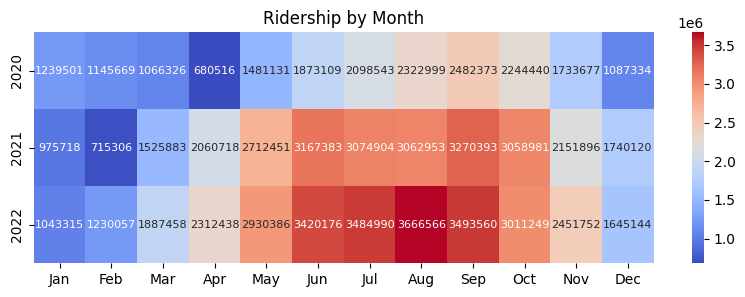

In [24]:
import matplotlib.pyplot as plt
import seaborn as sns

ridership_matrix = [list(data2020['ridership']), list(data2021['ridership']), list(data2022['ridership'])]

# Create a list of month names
month_names = ['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec']

# Set up the plot
fig, ax = plt.subplots(figsize=(10, 3))

# Set the font size for the tick labels
plt.xticks(fontsize=10)
plt.yticks(fontsize=10)

# Create the heatmap
sns.heatmap(ridership_matrix, cmap='coolwarm', annot=True, fmt='d', xticklabels=month_names, yticklabels=['2020', '2021', '2022'], annot_kws={"size": 8})

# Set the plot title
plt.title('Ridership by Month', fontsize=12)

# Display the plot
plt.show()

**For Month:**
The matrix shows seasonal cycle changes. The use of Citi Bike is obviously more concentrated from May to October. Whether this seasonal change is related to Covid will be further analyzed in Question 2.3.

Looking further at the images, it can be found that Covid pandemic conducted a significant impact on the use of Citi Bike at the beginning. In April 2020, the ridership amount of Citi Bike was significantly lower than in March when the Covid-19 was first discovered, and was completely different from the distribution in 2021 and 2022. Then, based on the comparation between the same period across different years, the ridership increased over time.

In conclusion, the Covid-19 pandemic had a significan impact on Citi Bike ridership at the beginning. Then, the ridership recovered and increased over time.

### **2.2 Ridership vs Day of Week**

**Question 1:** Is there any pattern over the ridership's distribution among days of week? Does the covid change the weekly pattern from March 2020 to September 2022?

First, group the data by day of week, I got the average number of ridership for each day of week. Then I created a bar chart to observe changes and show the distribution over day of week.

In [25]:
for i in range(7):
    day_ridership = Data_Mon[Data_Mon['Date'].dt.dayofweek == i]['ridership']

    avg_ridership = day_ridership.mean()
    print(f'Average ridership for day {i}: {avg_ridership}')

Average ridership for day 0: 65564.10256410256
Average ridership for day 1: 72475.85256410256
Average ridership for day 2: 74287.86624203822
Average ridership for day 3: 71856.20382165605
Average ridership for day 4: 72218.82165605096
Average ridership for day 5: 73387.92993630574
Average ridership for day 6: 65450.66025641026


In [26]:
days_of_week = ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']
avg_ridership_by_day = pd.DataFrame({'Day': days_of_week, 'Avg Ridership': avg_ridership})
avg_ridership_by_day

,Day,Avg Ridership
0,Monday,65450.660256
1,Tuesday,65450.660256
2,Wednesday,65450.660256
3,Thursday,65450.660256
4,Friday,65450.660256
5,Saturday,65450.660256
6,Sunday,65450.660256


In [27]:
import numpy as np
import matplotlib.pyplot as plt
import plotly.graph_objects as go

mean_ridership_by_day = Data_Mon.groupby(['DOW']).mean()['ridership'].reset_index()

# create a plotly bar chart
fig = go.Figure(data=[go.Bar(x=mean_ridership_by_day['DOW'], y=mean_ridership_by_day['ridership'], 
                             marker_color=mean_ridership_by_day['ridership'],
                             marker_colorscale='YlOrBr', 
                             text=mean_ridership_by_day['ridership'], 
                             textposition='auto',
                             )])

# update the layout with custom styles
fig.update_layout(title={'text': 'Mean Ridership by Day of Week', 'font': {'size': 16}, 'x': 0.5, 'y': 0.95},
                  xaxis={'title': 'Day of Week', 'titlefont': {'size': 14}, 'tickfont': {'size': 12},
                         'tickvals': mean_ridership_by_day['DOW'], 'ticktext': ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']},
                  yaxis={'title': 'Mean Ridership', 'titlefont': {'size': 14}, 'tickfont': {'size': 12},
                         'range': [int(mean_ridership_by_day['ridership'].min()-4000), int(mean_ridership_by_day['ridership'].max()+4000)]},
                  hovermode='x',
                  hoverlabel=dict(bgcolor='white', font_size=12, font_family='Arial'),
                  width=800, height=400,
                  margin=dict(l=50, r=50, t=100, b=50), 
                  plot_bgcolor='white',
                  showlegend=False,
                  )
fig.update_xaxes(showgrid=True, gridwidth=1, gridcolor='lightgray')
fig.update_yaxes(showgrid=True, gridwidth=1, gridcolor='lightgray')

fig.add_annotation(x=2, y=75000, text='Weekend has lower ridership', showarrow=False,
                   font=dict(family='Arial', size=12, color='black'), 
                   align='center', valign='middle', bgcolor='white', bordercolor='lightgray', borderwidth=1,
                   ax=20, ay=-30, arrowcolor='lightgray', arrowsize=1.5, arrowwidth=1.5)

fig.show()

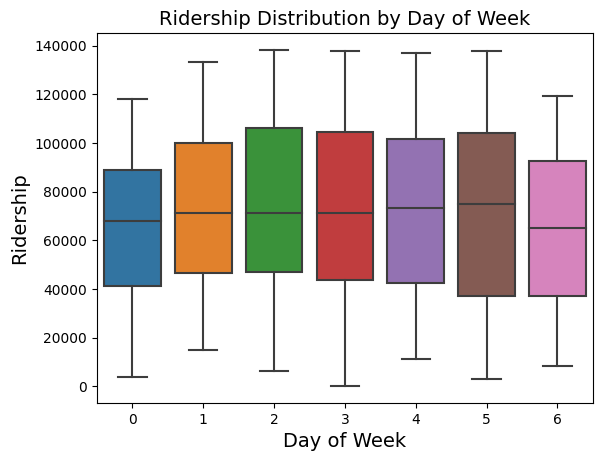

In [28]:
import seaborn as sns

sns.boxplot(x='DOW', y='ridership', data=Data_Mon)
plt.title('Ridership Distribution by Day of Week',fontsize=14)
plt.xlabel('Day of Week',fontsize=14)
plt.ylabel('Ridership',fontsize=14)
plt.show()

In [29]:
Data_Mon['Year'] = Data_Mon['Date'].dt.year
Data_Mon['Month'] = Data_Mon['Date'].dt.month
Data_Mon['DOW'] = Data_Mon['Date'].dt.dayofweek
mean_ridership_by_day_month = Data_Mon.groupby(['Year', 'Month', 'DOW']).mean()['ridership'].reset_index()

I then compared different days using a box line plot to check if the distribution pattern changes over time.

In [30]:
DOW_matrix = mean_ridership_by_day_month.pivot_table(index='DOW', columns=['Year', 'Month'], values='ridership')

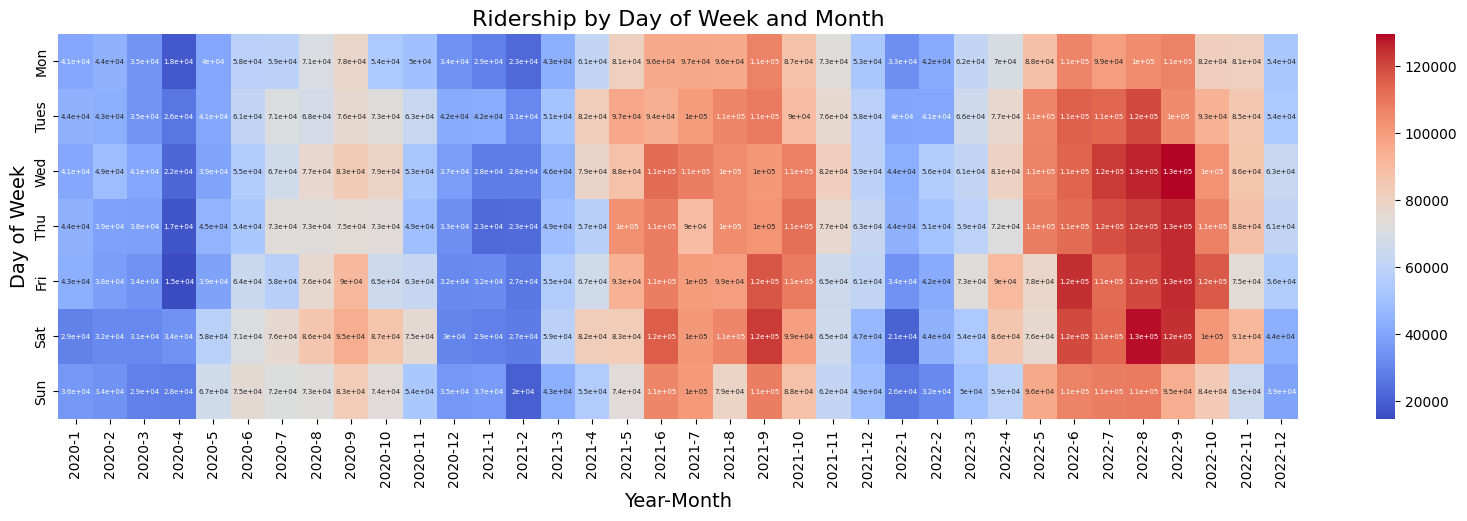

In [31]:
fig, ax = plt.subplots(figsize=(20, 5))

# Set the font size for the tick labels
plt.xticks(fontsize=10)
plt.yticks(fontsize=10)

# Create the heatmap
sns.heatmap(DOW_matrix, cmap='coolwarm', annot=True, yticklabels=['Mon', 'Tues', 'Wed','Thu','Fri','Sat','Sun'], annot_kws={"size": 5})

# Set the plot title
plt.title('Ridership by Day of Week and Month', fontsize=16)
plt.xlabel('Year-Month', fontsize=14)
plt.ylabel('Day of Week', fontsize=14)

# Display the plot
plt.show()

In [ ]:
!pip install ipywidgets

In [33]:
import matplotlib.pyplot as plt
import seaborn as sns
import ipywidgets as widgets
from IPython.display import display, clear_output
from ipywidgets import Output

# Define the output widget
output = Output()

def draw_heatmap(month):
    # Clear the previous output
    with output:
        output.clear_output(wait=True)

    # Filter the data to include only the selected month
    data = mean_ridership_by_day_month[mean_ridership_by_day_month['Month'] == month]

    # Create a pivot table with day of week as rows and year_month as columns
    DOW_matrix = data.pivot_table(values='ridership', index='DOW', columns=['Year', 'Month'])

    # Create the heatmap
    sns.heatmap(DOW_matrix, cmap='coolwarm', annot=True, yticklabels=['Mon', 'Tue', 'Wed','Thu','Fri','Sat','Sun'], annot_kws={"size": 5})

    # Set the plot title
    plt.title('Ridership by Day of Week and Month', fontsize=16)
    plt.xlabel('Year-Month', fontsize=14)
    plt.ylabel('Day of Week', fontsize=14)

    # Display the plot
    plt.show()

# Get a list of unique year_month values
months = sorted(mean_ridership_by_day_month['Month'].unique())

# Create a dropdown widget with the month values
month_dropdown = widgets.Dropdown(options=months)

# Define a callback function to update the plot when the dropdown value changes
def on_month_change(change):
    draw_heatmap(change.new)

# Register the callback function with the dropdown
month_dropdown.observe(on_month_change, names='value')

# Display the widgets
display(widgets.VBox([month_dropdown, output]))



*In this chart, we can select the month we want to view by using the drop-down widget in the upper left corner.*

The bar chart shows that Wednesday and Saturday have relatively high usage rates, while Monday and Sunday have relatively low usage rates. However, the distribution of weekdays in different months is not stable in the heatmap. For example, the ridership on Wednesday in May 2020 is much smaller than that on Sunday. This may be due to weather, holidays, and other factors that make some anomalies in the distribution of days of the week.

In summary, there is no clear pattern in the distribution of Citi Bike ridership during the week. Therefore, it is not feasible to determine if there is a significant change in the distribution pattern from 2020 to 2022.


**Question 2**: Does the number of Covid-19 positive cases correlates with Citi Bike ridership? Can Covid-19 explain the 3 major decreases of Citi Bike ridership?

I wanted to find the relationship between Covid positive cases and Citi Bike ridership. Firstly, I drew a line chart with 2 lines to show the change of Covid daily positive cases and Citi Bike daily ridership from 2020-1-1 to 2022-12-31. 

In [34]:
covid = pd.read_csv('/content/drive/MyDrive/dv/COVID2020-2022.csv');
covid.head()

,date_of_interest,CASE_COUNT
0,01/01/2020,0
1,01/02/2020,0
2,01/03/2020,0
3,01/04/2020,0
4,01/05/2020,0


In [35]:
covid.drop(covid.columns.difference(['date_of_interest','CASE_COUNT']), axis=1, inplace=True)
covid = covid.rename(columns={'date_of_interest': 'Date'})
covid['Date'] = pd.to_datetime(covid['Date'])

In [36]:
dataset.head()

,Date,ridership,PRCP,SNOW,SNWD,TAVG,TMAX,TMIN,rolling_mean,normalized_ridership
0,2020-01-01,18075,0.00,0.0,0.0,40,42,35,NaN,NaN
1,2020-01-02,41508,0.00,0.0,0.0,40,49,34,NaN,NaN
2,2020-01-03,31848,0.14,0.0,0.0,47,49,45,NaN,NaN
3,2020-01-04,29402,0.24,0.0,0.0,47,50,41,NaN,NaN
4,2020-01-05,27560,0.00,0.0,0.0,40,41,36,NaN,NaN


In [37]:
dataset['Date'] = pd.to_datetime(dataset['Date'])

In [38]:
covid_ridership = pd.merge(covid, dataset, on='Date', how='inner')

In [39]:
import plotly.graph_objs as go

# Create traces
trace1 = go.Scatter(x=covid['Date'], y=covid['CASE_COUNT'], mode='lines', name='Case Count')
trace2 = go.Scatter(x=dataset['Date'], y=dataset['ridership'], mode='lines', name='Ridership')

# Create layout
layout = go.Layout(title='COVID Case Count vs. Ridership', xaxis=dict(title='Date'), yaxis=dict(title='Count'))

# Create figure
fig = go.Figure(data=[trace1, trace2], layout=layout)

# Show the plot
fig.show()


*Hover over this interactive chart to see the data information of ridership and data for the corresponding point.*

To further verify the correlation between Covid positive cases and Citi Bike ridership, we drew a scatter plot.

In [40]:
# Create scatter plot
fig = go.Figure()

fig.add_trace(go.Scatter(x=covid_ridership['CASE_COUNT'], y=covid_ridership['ridership'], mode='markers', name='Covid Cases vs. Ridership'))

fig.update_layout(title='Covid-19 Case Count vs. Citi Bike Ridership',
                  xaxis_title='Covid-19 Case Count',
                  yaxis_title='Citi Bike Ridership')

fig.update_traces(hovertemplate='Covid Cases: %{x:.0f}<br>Ridership: %{y:.0f}<extra></extra>')

fig.update_layout(hovermode='closest', hoverlabel=dict(bgcolor="white", font_size=12, font_family="Arial"))

fig.show()


### **2.3: Citi Bike Ridership vs. MTA Rirdership**

In [41]:
MTA = pd.read_csv('/content/drive/MyDrive/dv/MTA2020-2022.csv');
MTA.head()

,Date,Subways Ridership,Buses Ridership
0,01/01/2020,1543674,2463665
1,01/02/2020,1857367,2847515
2,01/03/2020,1898546,2476743
3,01/04/2020,3554899,1474585
4,01/05/2020,3586437,2337863


In [42]:
print(MTA.columns)

Index(['Date', 'Subways Ridership', 'Buses  Ridership'], dtype='object')


In [43]:
MTA['Date'] = pd.to_datetime(MTA['Date'])
MTA.head()

,Date,Subways Ridership,Buses Ridership
0,2020-01-01,1543674,2463665
1,2020-01-02,1857367,2847515
2,2020-01-03,1898546,2476743
3,2020-01-04,3554899,1474585
4,2020-01-05,3586437,2337863


In [44]:
MTA_ridership = pd.merge(MTA, dataset, on='Date', how='inner')
MTA_ridership.head()

,Date,Subways Ridership,Buses Ridership,ridership,PRCP,SNOW,SNWD,TAVG,TMAX,TMIN,rolling_mean,normalized_ridership
0,2020-01-01,1543674,2463665,18075,0.00,0.0,0.0,40,42,35,NaN,NaN
1,2020-01-02,1857367,2847515,41508,0.00,0.0,0.0,40,49,34,NaN,NaN
2,2020-01-03,1898546,2476743,31848,0.14,0.0,0.0,47,49,45,NaN,NaN
3,2020-01-04,3554899,1474585,29402,0.24,0.0,0.0,47,50,41,NaN,NaN
4,2020-01-05,3586437,2337863,27560,0.00,0.0,0.0,40,41,36,NaN,NaN


In [45]:
import plotly.graph_objects as go

# Create a trace for subway ridership
trace1 = go.Scatter(x=MTA_ridership['Date'], y=MTA_ridership['Subways Ridership'], name='Subway', 
                    line=dict(color='olive', width=2))

# Create a trace for bus ridership
trace2 = go.Scatter(x=MTA_ridership['Date'], y=MTA_ridership['Buses  Ridership'], name='Bus', 
                    line=dict(color='lightskyblue', width=2))

# Create a trace for Citibike ridership
trace3 = go.Scatter(x=MTA_ridership['Date'], y=MTA_ridership['ridership'], name='Citibike', 
                    line=dict(color='gold', width=2))

# Create the figure with all the traces
fig = go.Figure(data=[trace1, trace2, trace3])

# Add interactive elements to the figure
fig.update_layout(title='MTA Ridership vs. Citibike Ridership',
                  xaxis=dict(title='Date'),
                  yaxis=dict(title='Subway and Bus Ridership'),
                  legend=dict(x=0, y=1, bgcolor='rgba(255, 255, 255, 0.5)'),
                  hovermode='x',
                  hoverlabel=dict(bgcolor='white', font_size=12, font_family='Arial'))

# Add a vertical line to highlight a specific date
fig.add_shape(type='line', x0='2021-03-14', x1='2021-03-14', y0=0, y1=MTA_ridership['ridership'].max(),
              line=dict(color='red', width=2))

# Show the figure
fig.show()


This line chart can show clearly about how the daily ridership for these three transportations changes.

In [46]:
MTA_monthly = MTA_ridership.groupby(pd.Grouper(key='Date', freq='M')).mean()

fig = go.Figure()

fig.add_trace(go.Scatter(x=MTA_monthly.index, y=MTA_monthly['Subways Ridership'], mode='lines', name='Subway', line=dict(color='olive')))
fig.add_trace(go.Scatter(x=MTA_monthly.index, y=MTA_monthly['Buses  Ridership'], mode='lines', name='Bus', line=dict(color='lightskyblue')))
fig.add_trace(go.Scatter(x=MTA_monthly.index, y=MTA_monthly['ridership'], mode='lines', name='Citibike', line=dict(color='gold'), yaxis='y2'))

fig.update_layout(
    title='MTA Ridership by Month',
    xaxis_title='Date',
    yaxis_title='Ridership',
    yaxis2=dict(
        title='Citibike Ridership',
        overlaying='y',
        side='right'
    ),
    legend=dict(orientation='h', yanchor='bottom', xanchor='right', y=1.02, x=1)
)

fig.show()

For the second line chart, we group the riderdership amount by month to show the general trend without cluttered.

**Analysis:** The line chart above can show the trend of daily ridership, we can see that between three different types of transportation, daily ridership for subway and bus decreased tremendously at the beginning of the pandemic, and their daily ridership haven't recovered to normal level after 2 years. However the Citi Bike’s ridership recovered soon and then increased significantly, which means Citi Bike was less affected by the pandemic compared to the other two transportation methods.

Meanwhile, from the second line chart, we can see the changing rate from the slopes. At the beginning of March in 2020, the slope of Citi Bike is relatively flat compared with other 2 transportations' slopes. Subway had the sharpest and most tremendous decrease based on its slope. This also demonstrated that Covid has more influence on subway and bus, and less influence on Citi Bike.

Furthermore, we can find the trend of Citi Bike’s ridership has a much more significant seasonal pattern compared with others, which verifies our conclusion for question 2.3. In winter, less people choose to use Citi Bike, but cold weather doesn't greatly affect the ridership for bus and subway.


 ## **Part 3:**
 ### **The relationship between ridership and some weather factors**

**Analysis:** From the line chart we can find when the number of covid positive cases increased, Citi Bike ridership would decrease. However, there is no significant correlation between Citi Bike ridership and Covid positive cases in the scatter plot. The significant changes at the beginning of 2020,2021,2022 may be seasonal changes since less people are willing to ride Citi Bike in a cold weather. And the Covid tend to get more active in winter. It's just a coincidence that we can observe a correlation in the line chart.

So based on above visualizations, we can conclude the pandemic decrease the ridership in March and April in 2020 after its first outbreak. But the ridership returned to normal level soon and then increased in 2021 and 2022. The decreases at the beginning of 2021 and 2022 are not caused by covid but by weather.

In [47]:
DatebyTAVG = Data_Mon.groupby(['TAVG']).\
            agg({'Date':'count','ridership':'sum'}).\
            rename(columns={'Date':'Trip_count'}).reset_index()
DatebyTAVG = DatebyTAVG.sort_values(by='TAVG')
DatebyTAVG.head()

,TAVG,Trip_count,ridership
0,11,1,12528
1,18,1,21401
2,19,1,9573
3,20,2,33316
4,21,2,67766


In [48]:
fig = go.Figure()

fig.add_trace(go.Scatter(x=DatebyTAVG['TAVG'], y=DatebyTAVG['ridership'], mode='lines', name='Ridership vs. Temperature'))

fig.update_layout(
    title='Ridership vs. Average Temperature',
    xaxis_title='Average Temperature',
    yaxis_title='Number of Trips',
    width=800,  # Adjust the width of the chart
    height=400   # Adjust the height of the chart
)

fig.show()

In [49]:
# Create a scatter plot using Plotly
fig = go.Figure(data=go.Scatter(x=DatebyTAVG['TAVG'], y=DatebyTAVG['ridership'], mode='markers',
                                marker=dict(size=10, color=DatebyTAVG['ridership'], colorscale='Blues'),
                                text=DatebyTAVG['ridership'],
                                hovertemplate='Avg Temp: %{x:.1f}°F<br>Number of Trips: %{text}<extra></extra>'))

# Add a regression line to the scatter plot
z = np.polyfit(DatebyTAVG['TAVG'], DatebyTAVG['ridership'], 1)
p = np.poly1d(z)
fig.add_trace(go.Scatter(x=DatebyTAVG['TAVG'], y=p(DatebyTAVG['TAVG']),
                         mode='lines', line=dict(color='red', width=2)))

# Update the layout with custom styles
fig.update_layout(title={'text': 'Relationship between Ridership and Average Temperature', 'font': {'size': 16}, 'x': 0.5, 'y': 0.95},
                  xaxis={'title': 'Average Temperature (°F)', 'titlefont': {'size': 14}, 'tickfont': {'size': 12}},
                  yaxis={'title': 'Number of Trips', 'titlefont': {'size': 14}, 'tickfont': {'size': 12}},
                  hovermode='closest',
                  hoverlabel=dict(bgcolor='white', font_size=12, font_family='Arial'),
                  width=800, height=400,
                  margin=dict(l=50, r=50, t=100, b=50), 
                  plot_bgcolor='white')

# Show the plot
fig.show()

*Hover the mouse over the scatter plot to see the temperature and ridership data for the corresponding point.*

The regression line represents the linear relationship between temperature and number of riders.

The x-axis and ridership on the y-axis. Each data point is represented by a marker whose size and color are determined by the ridership value. The plot also includes a red regression line showing the relationship between average temperature and ridership. We can see that citibike ridership and temperature are closely linked. The ridership is highest when the temperature is at 60°F-80°F.
